<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
IQR :  11899.625365
Q1 :  4740.28715
Q2 :  9382.033
Q3 :  16639.912515
LowerBound :  -13109.1508975
UpperBound :  34489.350562499996
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   sm

ValueError: could not convert string to float: 'female'

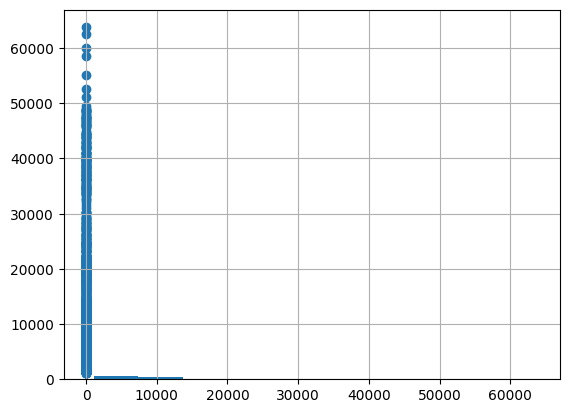

<Figure size 800x600 with 0 Axes>

In [4]:

import pandas as pd
df=pd.read_csv(r"D:\data science ppt\project\insurance.csv")
df.info()
df.head()
df.isnull().sum()
df.describe()

Q3 = df['charges'].quantile(0.75)
Q1 = df['charges'].quantile(0.25)

IQR = Q3 - Q1

LowerBound = Q1 - 1.5 * IQR
UpperBound = Q3 + 1.5 * IQR

print("IQR : ", IQR)
print("Q1 : ", Q1)
print("Q2 : ", df['charges'].quantile(0.5))
print("Q3 : ", Q3)
print("LowerBound : ", LowerBound)
print("UpperBound : ", UpperBound)
df['charges'].hist()
df[['age',	'bmi',	'children',	'charges']].corr()
df['age'].cov (df['charges'])
df['age'].corr(df['charges'])
df['age'].cov (df['bmi'])
df['age'].corr (df['bmi'])
from matplotlib import pyplot as plt

plt.scatter(df['age'],df['charges'])
from sklearn.model_selection import train_test_split
df.columns = df.columns.str.strip()

X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
df.info()


ordinal_features = ['smoker']
nominal_features=['sex','region']
numerical_columns = ['age','bmi','children']
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), nominal_features),
        ('le', OrdinalEncoder(), ordinal_features),
        ('ss', StandardScaler(), numerical_columns)
    ],
)

preprocessor
preprocessor.fit_transform(df)[0]

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



pipeline.fit(X_train,y_train)



import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.select_dtypes(include='number'))
plt.show()

